In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
%matplotlib inline
import matplotlib
from scipy.io import loadmat
from os.path import basename
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from pymr.heart import ahaseg

In [3]:
import nibabel
heart = nibabel.load(r"test_gt.nii.gz").get_fdata()

In [4]:
import pymr.heart as pyheart

In [5]:
heart.sum(axis=(0,1,2)).argsort()[::-1]

array([ 0,  9, 11,  1,  2,  3,  4,  5,  6,  7,  8, 10, 24, 23, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 12], dtype=int64)

0
1
2


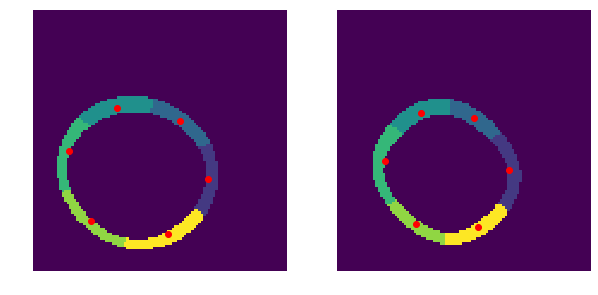

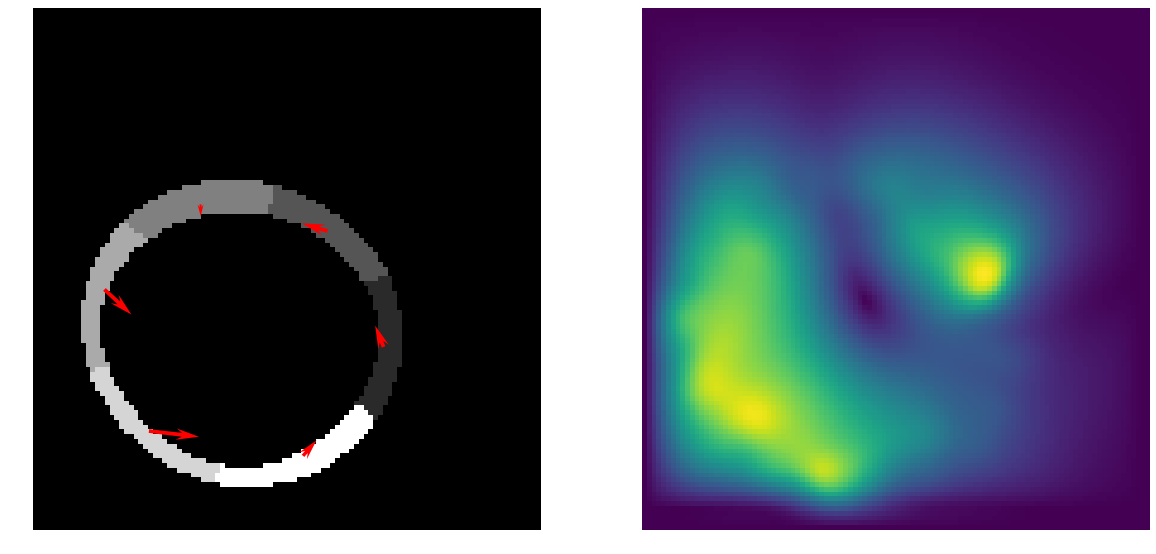

3


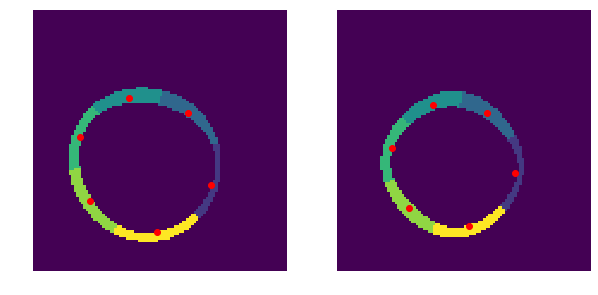

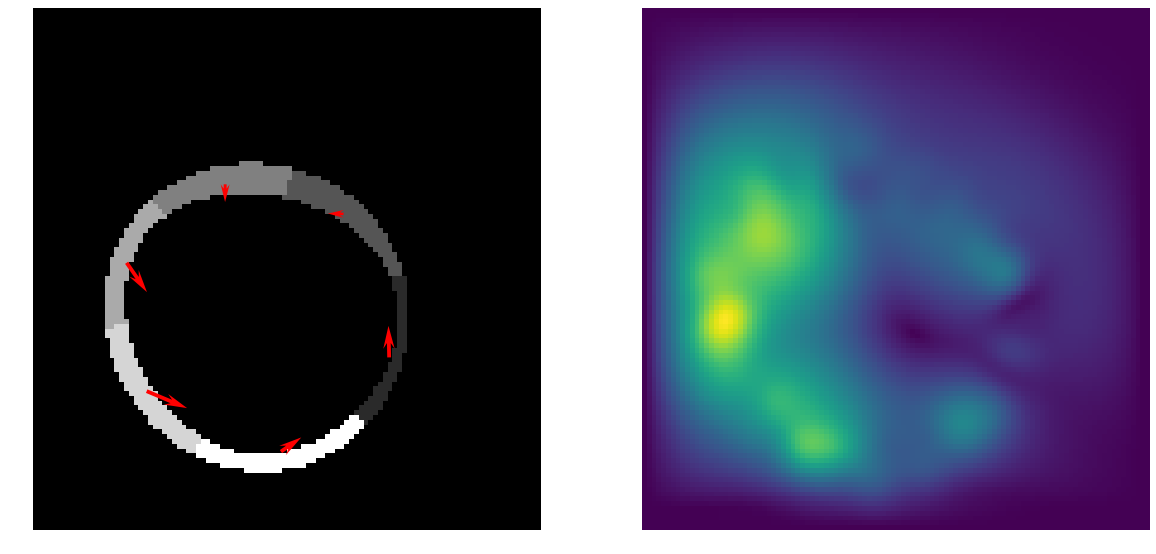

4


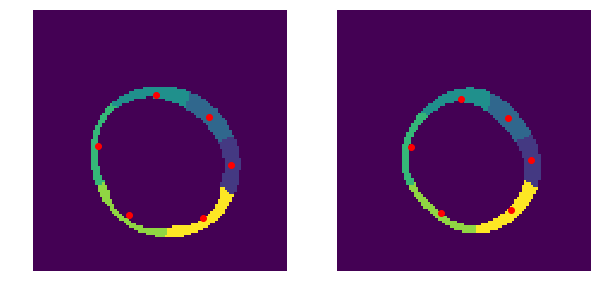

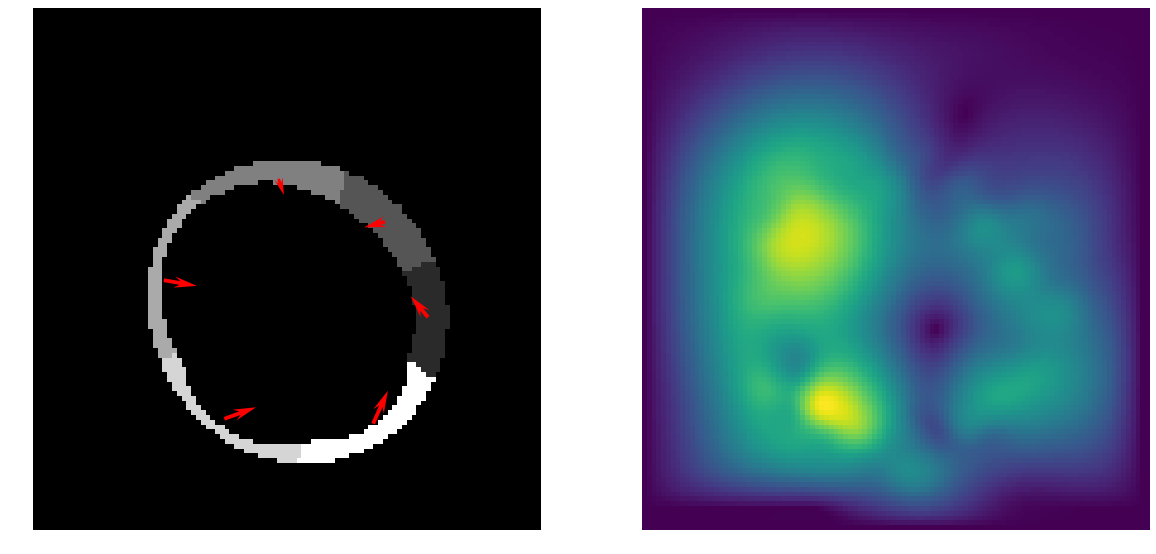

5


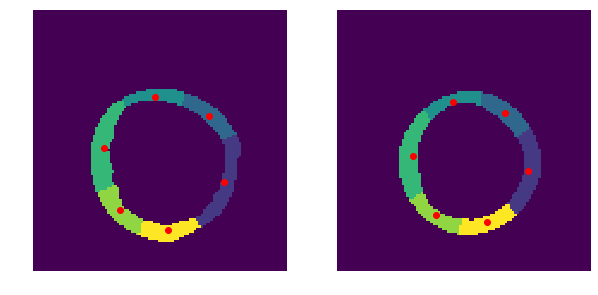

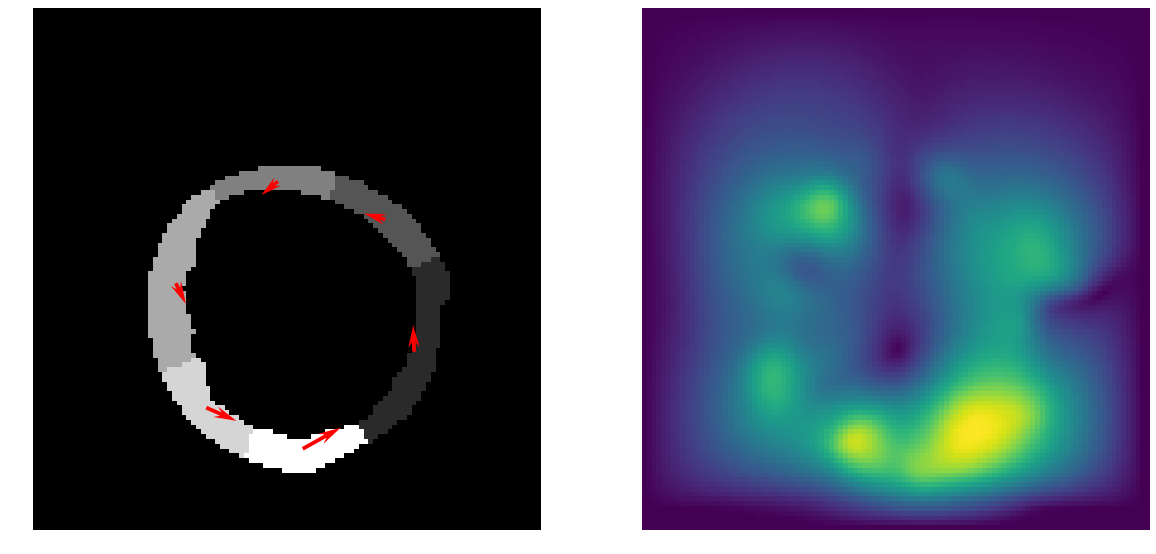

6


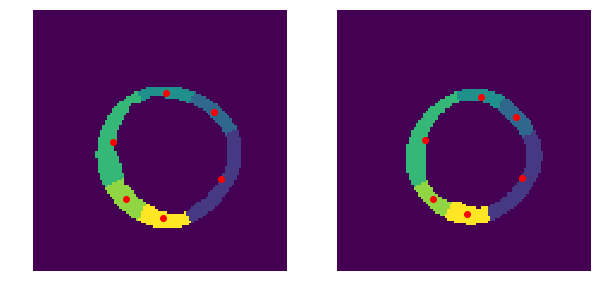

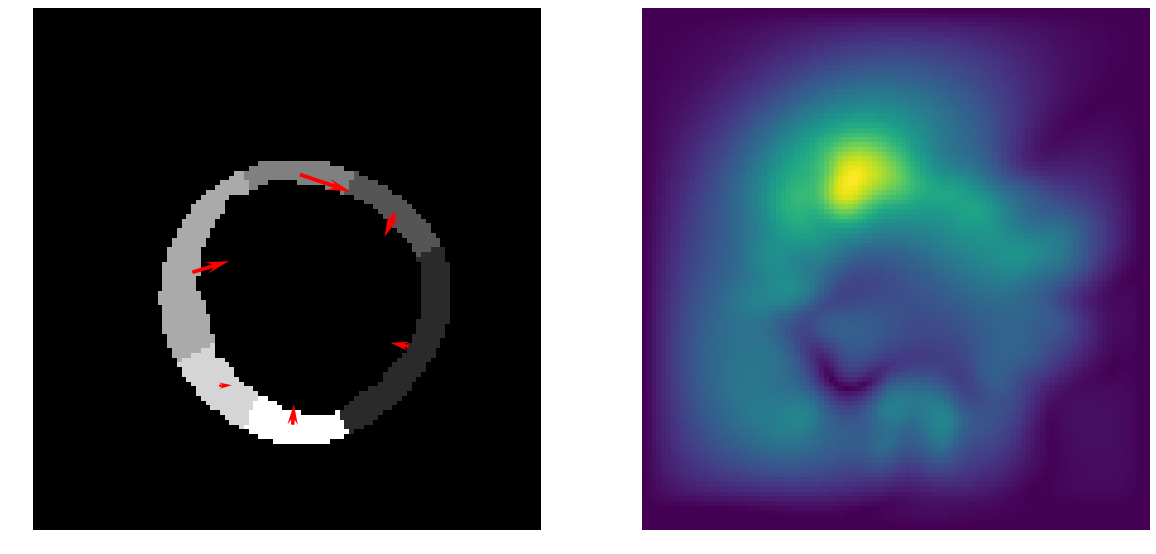

7


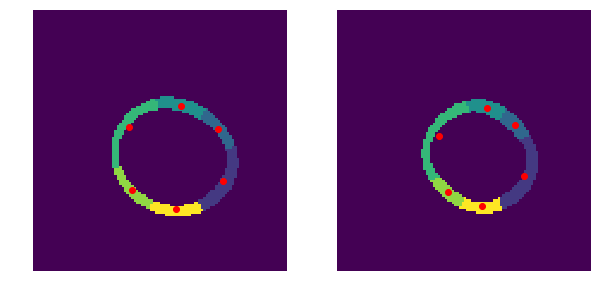

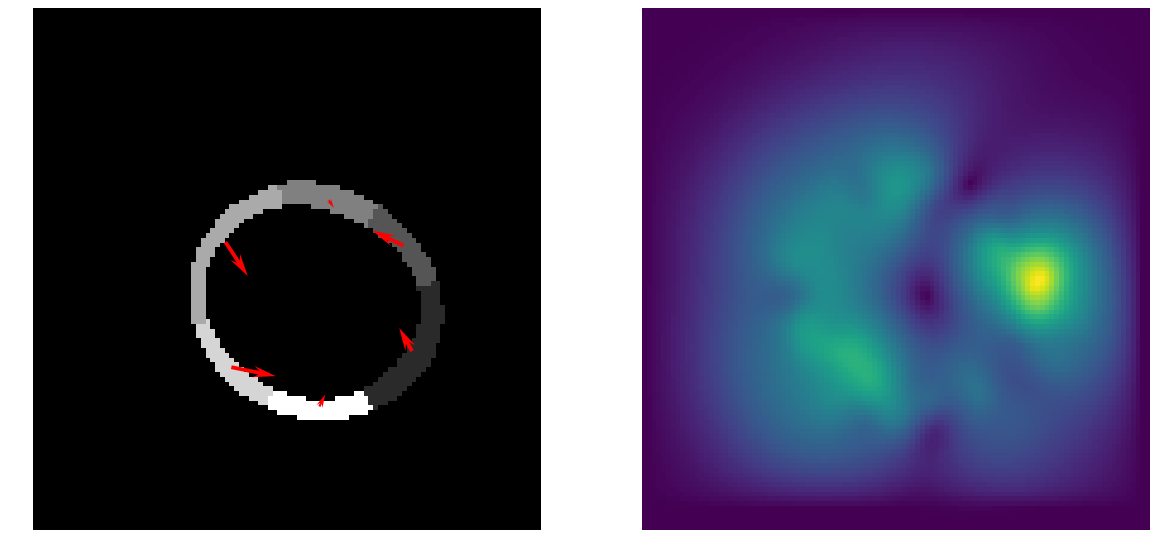

8


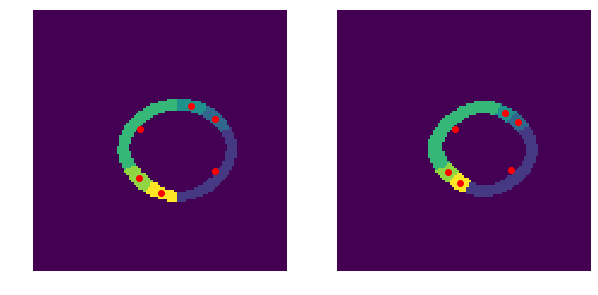

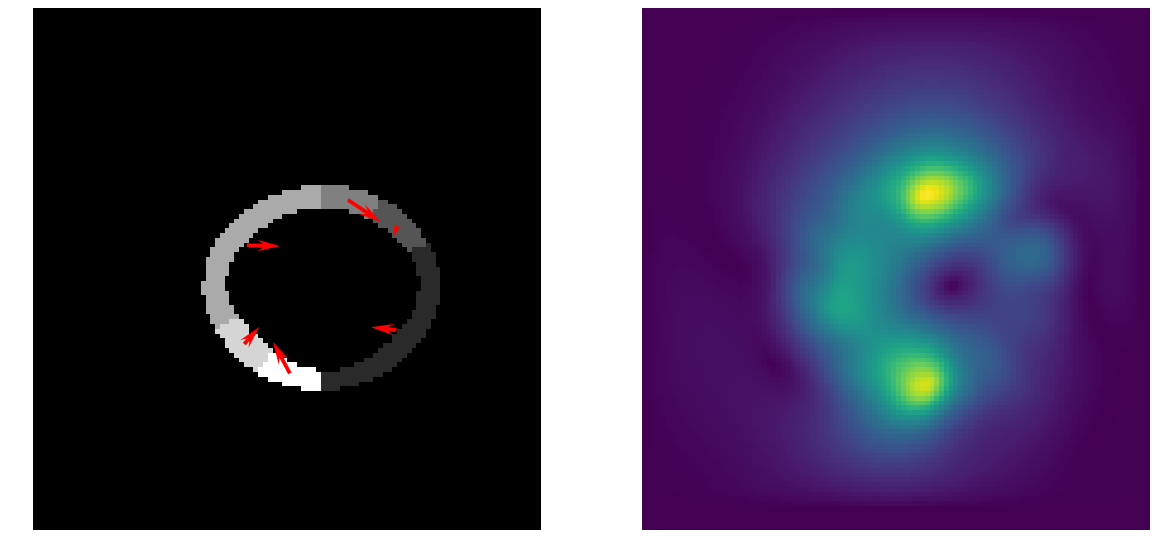

9


(-0.5, 741.5, 108.5, -0.5)

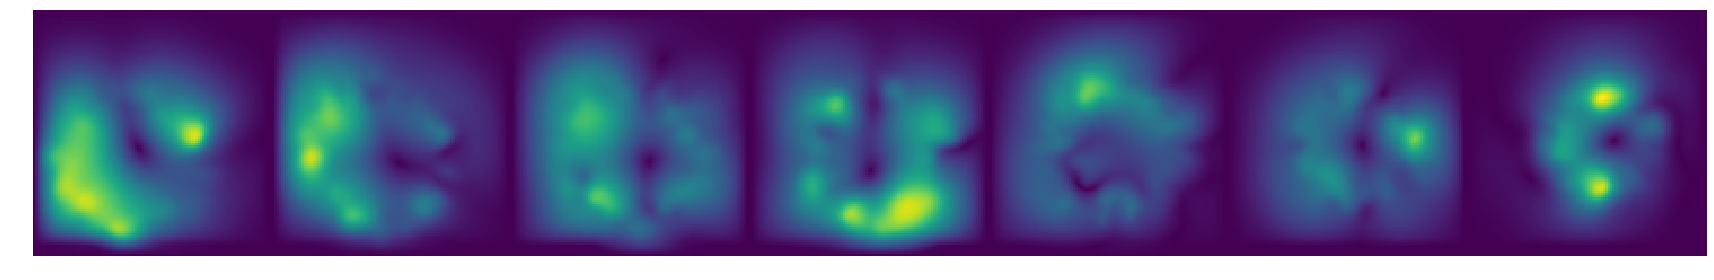

In [8]:
heart_crop, crop = pyheart.auto_crop(heart)
motion_map_list = []
for ii in range(heart_crop.shape[2]):
    print(ii)
    heart_mask = heart_crop[..., ii, :]
    motion_vector, motion_map = pyheart.motion.motion_ana_xyt(heart_mask, nseg=6, display=True)
    if np.sum(motion_map)==0:
        continue
    motion_map_list.append(motion_map)

plt.figure(figsize=(30,5))
plt.imshow(np.hstack(motion_map_list))
plt.axis('off')
